<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_48_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 49: Logistic Regression - Decision Boundary



In the last class, you learnt to build a logistic regression model purely using the sigmoid function and predicted the outcomes i.e. the patients having and not having heart disease by choosing different threshold values.

In this class, you will create a linear function using the features in the dataset and pass it as an input to the sigmoid function. However, we will take a small detour from the heart disease prediction dataset and choose the ideal data to understand the rationale behind building a linear function.

---

#### Activity 1: Create Dummy Dataset

Let's create a dummy dataset having two columns representing two independent variables, another column representing the target and a total of 1000 records (or rows).

You will shortly get to know the reason behind the creation of a dummy data-frame.

To create a dummy data-frame, firstly, create two arrays using the `make_blobs()` function of the `sklearn.datasets` module. The syntax for the `make_blobs()` function is as follows:

**Syntax:** `make_blobs(n_samples, centers, n_features, random_state, cluster_std)`

where

- `n_samples` determines the number of records to be generated in a dataset

- `centers` determines the number of classes to be generated (or labels) for the target column

- `n_features` determines the number of features (or independent variables) to be generated in the dataset

- `random_state` determines the random number generation for dataset creation. An integer value of the `random_state` parameter will produce the same results across different function calls. Popular integer random seeds are 0 and 42.

- `cluster_std` determines the standard deviation of the clusters.

The function will return two arrays. You can store these two arrays in two variables, say `features_array` and `target_array`, where the former contains features (or independent variables) and the latter contains the target or (dependent variable).

In [ ]:
# Create two arrays using the 'make_blobs()' function and store them in the 'features_array' and 'target_array' variables.
from sklearn.datasets import make_blobs
features_array,target_array = make_blobs(n_samples= 1000, centers = 2, n_features= 2, random_state= 42, cluster_std = 1.25)



**Note:** The `make_blobs()` function can take in more parameters that can be passed to create more customised data. You may refer to the following document:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

You can find out the object-type of the arrays created by the `make_blob()` function and the number of rows and columns in them.

In [ ]:
#  Find out the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(type(features_array))
print(type(target_array))
print(features_array.shape)
target_array.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 2)


(1000,)

Now that you have created two arrays, as the next step to create a dummy data-frame, create a Python dictionary from the two arrays and then a Pandas DataFrame from the dictionary using the `from_dict()` function of the `pandas` module.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

In [ ]:
features_array

array([[-1.46458248,  7.60215256],
       [ 6.73700485,  1.28118438],
       [ 3.26953498,  0.17310608],
       ...,
       [ 2.92500241, -0.04378206],
       [ 6.04744165,  1.90892753],
       [ 0.22805604,  8.00391327]])

In [ ]:
features_array.shape[0]

1000

In [ ]:
target_array

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [ ]:
#Create a Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.
import pandas as pd

dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(1000)],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)
dummy_df

,col 1,col 2,target
0,-1.464582,7.602153,0
1,6.737005,1.281184,1
2,3.269535,0.173106,1
3,5.293423,1.256045,1
4,4.414279,5.964554,1
...,...,...,...
995,-1.718220,11.852652,0
996,5.546249,2.618393,1
997,2.925002,-0.043782,1
998,6.047442,1.908928,1


Now we have a `pandas` DataFrame having 1000 records, 3 columns out of which 2 columns represent independent variables and 1 represent target.

Let's count the number of 0s and 1s in the `target` column of the `dummy_df` DataFrame.


In [ ]:
dummy_df["col 1"].describe()

,col 1
count,1000.000000
mean,1.103558
std,3.804142
min,-6.560782
25%,-2.486160
50%,1.300121
75%,4.694447
max,7.945308


In [ ]:
# Display the number of occurrences of each label in the 'target' column.
dummy_df['target'].value_counts()

,count
target,
0,500
1,500


As you can see, both the labels (0s and 1s) are equal in number in the `target` column.


---

#### Activity 2: Cluster Visualisation

*   List item

*   List item
*   List item


*   List item



If you create a scatter plot between the columns `col 1` and `col 2` for the labels 0 and 1, then you will see two clusters of dots (or points).

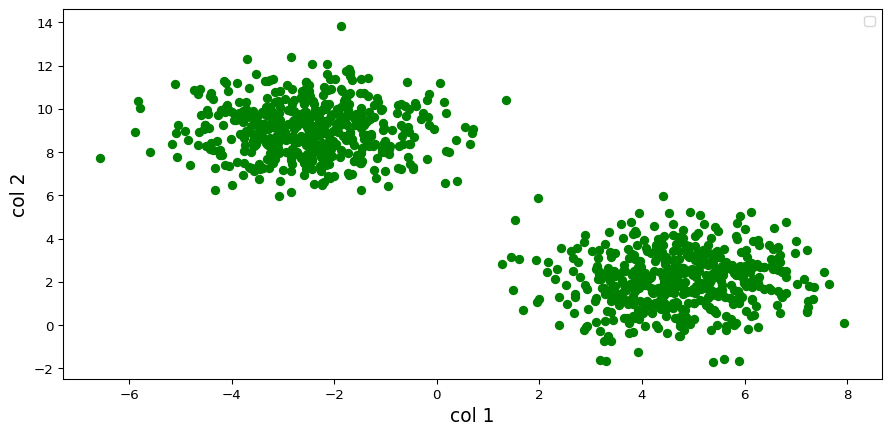

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 5), dpi = 96)
plt.scatter(dummy_df["col 1"],dummy_df["col 2"], color = 'g')
#plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.xlabel('col 1', fontsize = 14)
plt.ylabel('col 2', fontsize = 14)
plt.legend()
plt.show()

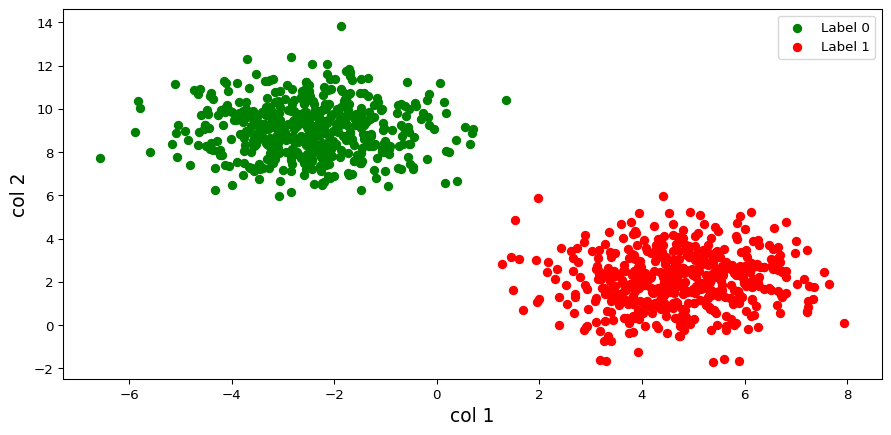

In [ ]:
# Create a scatter plot between 'col 1' and 'col 2' columns separately for both the classes in the same plot.
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 5), dpi = 96)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.xlabel('col 1', fontsize = 14)
plt.ylabel('col 2', fontsize = 14)
plt.legend()
plt.show()


This is the reason behind creating a dummy data-frame. Here, you can clearly see that two different coloured clusters are formed for the two different labels (or classes). You can draw an imaginary straight line to separate the two clusters from each other.

For the sake of better understanding, let's assume that the equation of the straight line separating the two clusters is $x = 1$ (*even if the equation is incorrect*).

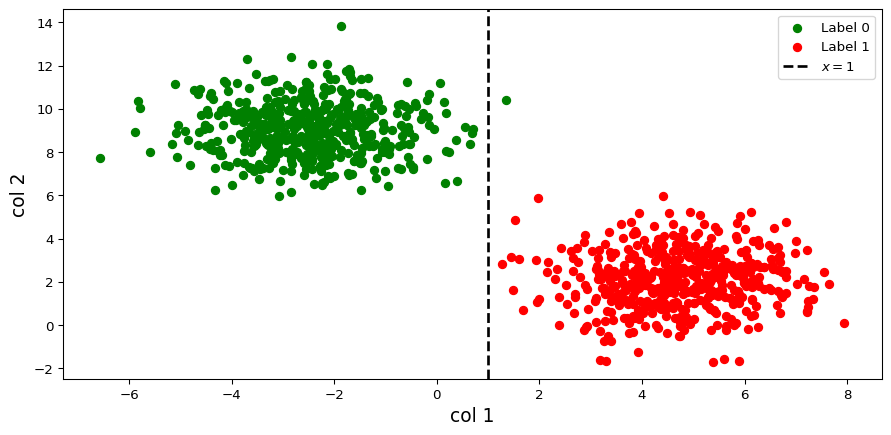

In [ ]:
#  Plot the line x = 1 in the above scatter plot.
plt.figure(figsize = (11, 5), dpi = 96)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.axvline(x = 1, color = 'black', linewidth = 2, linestyle = '--', label = r'$x = 1$')
plt.xlabel('col 1', fontsize = 14)
plt.ylabel('col 2', fontsize = 14)
plt.legend()
plt.show()

So any point on the left-hand side of the line can be classified as 0 and any point on the right-hand side of the line can be classified as 1. This imaginary straight line separating the two clusters and classifying the points as 0 and 1 is called the **decision boundary**.

Keeping the same idea in mind, you can conclude that you need more and more features in a dataset so that different clusters could be formed for different classes and these clusters can be separated by a decision boundary.

To keep things simple, for this dummy dataset, we will consider only two features (or independent variables) to have a two-dimensional decision boundary. If we consider more than two features, then we will have to deal with a higher-dimensional decision boundary which is difficult to visualise on a two-dimensional plane.

Your next task is to find out the equation of this decision boundary. The required equation will be the input to the sigmoid function to get the probabilities. Then w.r.t. a threshold value, you can classify the outcomes as 0 and 1.

**Equation of a Straight Line in General Form**

Before continuing ahead with the decision boundary, let's learn the equation of a straight line in the general form.

You already know that the equation of a straight line is given as

$$y = mx + c$$

where

- $m$ is the slope of a line and

- $c$ is the intercept made by the line on the $y$-axis

The equation of a straight line in the **general form** is given as

$$ax + by + c = 0$$

where

- $a$ is the coefficient of $x$,

- $b$ is the coefficient of $y$, and

- $c$ is some arbitrary constant

If you rewrite the above general equation as follows

$$by = -ax - c$$
$$\Rightarrow y = - \left(\frac{a}{b}\right) x - \frac{c}{b}$$

then you get the equation of the straight line back in the **slope-intercept** form where

- the slope is $-\frac{a}{b}$; more precisely $-\frac{\text{coefficient of } x}{\text{coefficient of }y}$ and

- the intercept-made by the line on the $y$-axis is $-\frac{c}{b}$; more precisely $-\frac{\text{arbitrary constant}}{\text{coefficient of }y}$

**Note:** The $c$ in $y = mx + c$ is **not** the same as the $c$ in $ax + by + c = 0$

With the knowledge of the general form of the equation of a straight line, you can assume that the equation of the decision boundary is

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$$

or

$$\beta_1 x_1 + \beta_2 x_2 + \beta_0 = 0$$

If you compare it with the equation of a straight line in the general form,

$$ax + by + c = 0$$

then

$$\beta_1 = a, x_1 = x, \beta_2 = b, x_2 = y \space{} \text{and} \space{} \beta_0 = c$$

In this case, $x_1$ and $x_2$ represent the `col 1` and `col 2` columns respectively.

To find this decision boundary (the straight line given by $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$), you need to build a logistic regression model between $x_1$ and $x_2$. From this model, you will get the coefficients i.e., $\beta_0, \beta_1$ and $\beta_2$.

So now, calculate the coefficients.

In [ ]:
dummy_df.columns[:-1]

Index(['col 1', 'col 2'], dtype='object')

In [ ]:
 #Calculate the coefficients by building a logistic regression model using the 'sklearn' model.
from sklearn.linear_model import LogisticRegression

X = dummy_df[dummy_df.columns[:-1]] # Features
y = dummy_df['target'] # Target


logistic_reg1 = LogisticRegression(random_state=0).fit(X, y)

logistic_reg1.intercept_

array([6.32668684])

In [ ]:
logistic_reg1.coef_

array([[ 1.46792761, -1.36068143]])

In [ ]:
# Calculate the coefficients by building a logistic regression model using the 'sklearn' model.
from sklearn.linear_model import LogisticRegression

X = dummy_df[dummy_df.columns[:-1]] # Features
y = dummy_df['target'] # Target

def decision_boundary_coeffs(X, y):
  logistic_reg = LogisticRegression(random_state=0).fit(X, y)
  coef_list = list(logistic_reg.intercept_) + list(logistic_reg.coef_[0])
  return coef_list

coef_list = decision_boundary_coeffs(X, y)
for i in range(len(coef_list)):
  print(f"Beta {i} = {coef_list[i]:.4f}")

Beta 0 = 6.3267
Beta 1 = 1.4679
Beta 2 = -1.3607


In [ ]:
coef_list

[6.326686838390892, 1.46792761011123, -1.360681430800604]

Now that you have the required coefficients, you can get the equation of the decision boundary (in this case; a straight line).

Next, let's plot the decision boundary (or straight line) in the above scatter plot. To plot the line, you can

- plot the `col 1` values on the $x$-axis

- calculate the `col 2` values from the $\beta_0, \beta_1, \beta_2$ and the `col 1` values using the expression
  $$x_2 = - \left( \frac{\beta_1}{\beta_2} \right) x_1 - \frac{\beta_0}{\beta_2}$$
  or
  $$x_2 = - \left( \frac{\beta_1 x_1 + \beta_0}{\beta_2} \right)$$
  or
  $$x_2 =  \left( \frac{- \beta_0-\beta_1 x_1}{\beta_2} \right)$$

In [ ]:
dummy_df['col 1']

,col 1
0,-1.464582
1,6.737005
2,3.269535
3,5.293423
4,4.414279
...,...
995,-1.718220
996,5.546249
997,2.925002
998,6.047442


In [ ]:
pred_col2_value = (-coef_list[0]-(coef_list[1]*dummy_df['col 1']))/coef_list[2]

In [ ]:
pred_col2_value

,col 1
0,3.069628
1,11.917648
2,8.176879
3,10.360286
4,9.411849
...,...
995,2.795999
996,10.633039
997,7.805191
998,11.173735


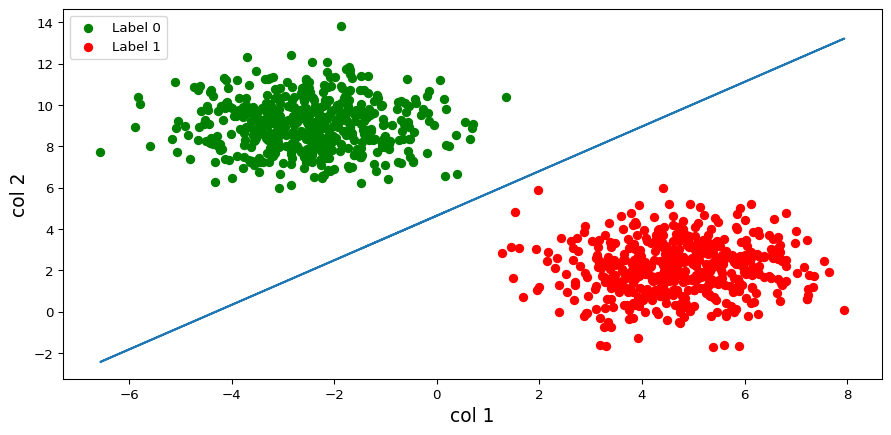

In [ ]:
#  Plot the calculated regression line in above scatter plot.
pred_col2_value = (-coef_list[0]-(coef_list[1]*dummy_df['col 1']))/coef_list[2]
plt.figure(figsize = (11, 5), dpi = 96)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.plot(dummy_df['col 1'],pred_col2_value)
plt.xlabel('col 1', fontsize = 14)
plt.ylabel('col 2', fontsize = 14)
plt.legend()
plt.show()

In [ ]:
coef_list

As you can see, the decision boundary clearly separates the two clusters for the two classes.

---

#### Activity 3: Predictions

Now, your next task is to predict the `target` values based on the `col 1` and `col 2` values using the sigmoid function and some threshold value, say 0.5.

Let's rewrite the sigmoid function as
$$p =  \frac{1}{1 + e^{-h}}$$

where
- $p$ is the probability value between 0 and 1
- $h$ is some relationship between $x_1, x_2, x_3, \dots, x_n$
- $x_1, x_2, x_3, \dots, x_n$ are $n \in N$ feature(s) in a dataset

In this case of dummy dataset, $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

You can also read $h$ as a **hypothesis**. In a broader sense, to predict the labels 0 and 1 through logistic regression for the dummy dataset, you need to pass a hypothesis as an input to the sigmoid function. In this case, the hypothesis is that the `col 1` and `col 2` values have a linear relationship ($h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$) that predicts the labels 0 and 1.

$$\therefore p =\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

where $\beta_0, \beta_1, \beta_2$ are coefficients and $x_1, x_2$ are the independent variables.

The above expression can also be written as

$$p =\frac{1}{1 + e^{-BX^T}}$$

where

- $X$ denotes the feature matrix i.e.

  $$X = \begin{bmatrix} 1 & x_{1,1} & x_{2,1} \\ 1 & x_{1,2} & x_{2,2}\\ 1 & x_{1,3} & x_{2,3} \\ \vdots & \vdots & \vdots \\ 1 & x_{1,1000} & x_{2,1000} \end{bmatrix}$$

  Each item in the above matrix can be represented by $x_{i,j}$ where $x_{i,j}$ denotes the $j^{\text{th}}$ item in the $i^{\text{th}}$ column. Also the values of $i$ goes from $1$ to $2$ and the values of $j$ goes from $1$ to $1000$.

- $B$ denotes the regression coefficients matrix i.e.

  $$B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$$

Essentially, $$h = BX^T$$


The above product after taking the transpose of the features matrix becomes

$$h = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix} \begin{bmatrix} 1 & 1 & 1 & \dots & 1 \\ x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,1000} \\ x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,1000} \end{bmatrix}$$

So let's create the `sigmoid()` function in Python that takes the arrays containing the features and the regression coefficients as inputs and returns the probability values as output. But first, you need to add a column containing 1s to the features array.

In [ ]:
#Add a column containing 1s to the features array.
import numpy as np

new_features_array = np.append(np.ones(shape = (features_array.shape[0], 1)), features_array, axis = 1)
new_features_array


array([[ 1.        , -1.46458248,  7.60215256],
       [ 1.        ,  6.73700485,  1.28118438],
       [ 1.        ,  3.26953498,  0.17310608],
       ...,
       [ 1.        ,  2.92500241, -0.04378206],
       [ 1.        ,  6.04744165,  1.90892753],
       [ 1.        ,  0.22805604,  8.00391327]])

In the above code:

1. `np.ones(shape = (features_array.shape[0], 1)` generates a NumPy array containing 1s and has 1000 rows and 1 column.

2. `np.append()` function adds the `features_array` to the array created in the first step column-wise (denoted by `axis = 1`). The general syntax is
   `np.append(parent_matrix, matrix_to_be_added_to_the_parent_matrix)`


In [ ]:
coef_list

[6.326686838390892, 1.46792761011123, -1.360681430800604]

In [ ]:
#  Create the 'sigmoid()' function.
def sigmoid(features_matrix, coef_matrix):
    sigmoid_output_matrix = 1/(1 + np.exp(-1 * np.matmul(coef_matrix, np.transpose(features_matrix))))
    return np.array(sigmoid_output_matrix)

sigmoid_outputs = sigmoid(new_features_array, coef_list)
sigmoid_outputs[:10] # Displaying the first 10 items.

array([2.09245618e-03, 9.99999482e-01, 9.99981368e-01, 9.99995832e-01,
       9.90902989e-01, 9.99988692e-01, 9.99995614e-01, 2.84447892e-05,
       9.99983571e-01, 2.94538720e-06])

In [ ]:
#Create the 'sigmoid()' function.
# without matrix form
def sigmoid(h):
    sigmoid_output_matrix =1/(1+np.exp(-h))
    return np.array(sigmoid_output_matrix)
h = coef_list[0] + (coef_list[1]*dummy_df["col 1"])+(coef_list[2]*dummy_df["col 2"])
sigmoid_outputs =sigmoid(h)
sigmoid_outputs[:10]


array([2.09245618e-03, 9.99999482e-01, 9.99981368e-01, 9.99995832e-01,
       9.90902989e-01, 9.99988692e-01, 9.99995614e-01, 2.84447892e-05,
       9.99983571e-01, 2.94538720e-06])

**Note:** The matrix multiplication rules are applicable to the NumPy arrays as well.

Now, let's create a scatter plot between the $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$ values and their corresponding sigmoid outputs.

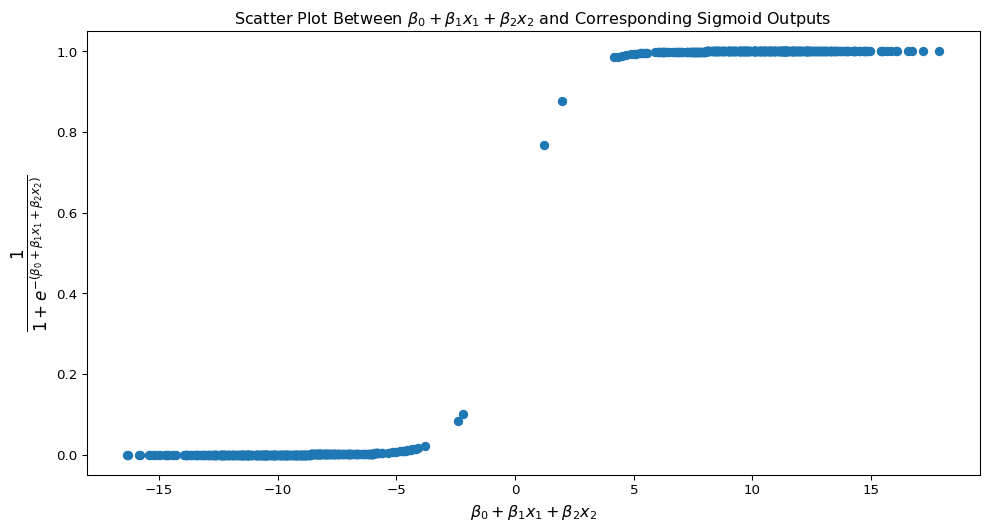

In [ ]:
#Create a scatter plot between the 'h' values and their corresponding sigmoid outputs.
plt.figure(figsize = (12, 6), dpi = 96)
plt.title("Scatter Plot Between " + r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2$" + " and Corresponding Sigmoid Outputs")
plt.scatter(np.matmul(coef_list, np.transpose(new_features_array)), sigmoid_outputs)
plt.xlabel(r'$\beta_0 + \beta_1 x_1 + \beta_2 x_2$', fontsize = 12)
plt.ylabel(r'$\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$', fontsize = 18)
plt.show()


As you can see, the above plot follows the sigmoid curve.

Now, let's predict the target values w.r.t. the threshold value of 0.5

In [ ]:
#  Predict the target values w.r.t. the threshold value of 0.5
predicted_target = [1 if item >= 0.5 else 0 for item in sigmoid_outputs]
predicted_target[:10] # Displaying the first 10 items.

[0, 1, 1, 1, 1, 1, 1, 0, 1, 0]

Finally, let's calculate the accuracy of the logistic regression model built through a confusion matrix, precision value, recall value and f1-score.

In [ ]:
#  Evaluate the accuracy of the logistic regression model built through a confusion matrix, precision value, recall value and f1-score.
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(dummy_df['target'],predicted_target))
print(classification_report(dummy_df['target'],predicted_target))

[[500   0]
 [  0 500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



As you can see,
- The FP and FN values in the confusion matrix are 0
- The precision and recall values are 1
- The f1-score is also 1

This clearly shows that the decision boundary accurately separates the labels (or classes) with 100% accuracy.

Let's stop here. In the next class, we will study more concepts on logistic regression.

---

In the last activity, you learnt to calculate the decision boundary by building a logistic regression model using the `sklearn` module. In this activity, you will begin to learn to estimate the decision boundary purely through maths.


---

#### Dummy Dataset



In [ ]:
# Dummy dataset creation using the 'make_blob()' function.
import pandas as pd
from sklearn.datasets import make_blobs

features_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 42, cluster_std = 1.25)

# Object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array is an {type(features_array)} object.\nThe target array is an {type(target_array)} object.\n")
print(f"The features array has {features_array.shape[0]} rows and {features_array.shape[1]} columns.")
print(f"The target array has {target_array.shape[0]} rows and {len(target_array.shape)} column.")

# Pandas DataFrame creation.
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)

# The number of occurrences of each label in the 'target' column.
print(f"Target counts:\n{dummy_df['target'].value_counts()}")

---

#### Cluster Visualisation

In [ ]:
# Scatter plot between 'col 1' and 'col 2' columns separately for both the classes in the same plot.
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 5), dpi = 96)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.xlabel('col 1', fontsize = 14)
plt.ylabel('col 2', fontsize = 14)
plt.legend()
plt.show()

#### Calculating Coefficients Using `sklearn` Module

In [ ]:
# Coefficients Estimation by building a logistic regression model using the 'sklearn' model.
from sklearn.linear_model import LogisticRegression

X = dummy_df[dummy_df.columns[:-1]] # Features
y = dummy_df['target'] # Target

def decision_boundary_coeffs(X, y):
  logistic_reg = LogisticRegression(random_state=0).fit(X, y)
  coef_list = list(logistic_reg.intercept_) + list(logistic_reg.coef_[0])
  return coef_list

coef_list = decision_boundary_coeffs(X, y)
for i in range(len(coef_list)):
  print(f"Beta {i} = {coef_list[i]:.4f}")

# Plotting the decision boundary
pred_col2_values = - (coef_list[0] + coef_list[1] * dummy_df['col 1']) / coef_list[2]

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("\n\nClusters with Linear Decision Boundary", fontsize = 14)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.plot(dummy_df['col 1'], pred_col2_values, color = 'b', linewidth = 2, label = r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$")
plt.xlabel(r"$x_1$", fontsize = 14)
plt.ylabel(r"$x_2$", fontsize = 14)
plt.legend()
plt.show()

---

#### Predictions

The sigmoid function is given as
$$p =  \frac{1}{1 + e^{-h}}$$

where
- $p$ is the probability value between 0 and 1
- $h$ is some relationship between $x_1, x_2, x_3, \dots, x_n$
- $x_1, x_2, x_3, \dots, x_n$ are $n \in N$ feature(s) in a dataset

In this case of dummy dataset, $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

$$\therefore p =\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

where $\beta_0, \beta_1, \beta_2$ are coefficients and $x_1, x_2$ are the independent variables.

The above expression can also be written as

$$p =\frac{1}{1 + e^{-BX^T}}$$

where

- $X$ denotes the feature matrix i.e.

  $$X = \begin{bmatrix} 1 & x_{1,1} & x_{2,1} \\ 1 & x_{1,2} & x_{2,2}\\ 1 & x_{1,3} & x_{2,3} \\ \vdots & \vdots & \vdots \\ 1 & x_{1,1000} & x_{2,1000} \end{bmatrix}$$

  Each item in the above matrix can be represented by $x_{i,j}$ where $x_{i,j}$ denotes the $j^{\text{th}}$ item in the $i^{\text{th}}$ column. Also the values of $i$ goes from $1$ to $2$ and the values of $j$ goes from $1$ to $1000$.

- $B$ denotes the coefficients matrix i.e.

  $$B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$$

Essentially, $$h = BX^T$$


The above product after taking the transpose of the features matrix becomes

$$h = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix} \begin{bmatrix} 1 & 1 & 1 & \dots & 1 \\ x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,1000} \\ x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,1000} \end{bmatrix}$$


In [ ]:
# Adding a column containing 1s to the features array.
import numpy as np

new_features_array = np.append(np.ones(shape = (features_array.shape[0], 1)), features_array, axis = 1)

# Create the 'sigmoid()' function.
def sigmoid(features_matrix, coef_matrix):
    sigmoid_output_matrix = 1/(1 + np.exp(-1 * np.matmul(coef_matrix, np.transpose(features_matrix))))
    return np.array(sigmoid_output_matrix)

sigmoid_outputs = sigmoid(new_features_array, coef_list)

# Scatter plot between the 'h' values and their corresponding sigmoid outputs.
plt.figure(figsize = (12, 6), dpi = 96)
plt.title("Scatter Plot Between " + r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2$" + " and Corresponding Sigmoid Outputs")
plt.scatter(np.matmul(coef_list, np.transpose(new_features_array)), sigmoid_outputs)
plt.xlabel(r'$\beta_0 + \beta_1 x_1 + \beta_2 x_2$', fontsize = 12)
plt.ylabel(r'$\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$', fontsize = 18)
plt.show()

In [ ]:
# Predicting the target values w.r.t. the threshold value of 0.5
predicted_target = [1 if item >= 0.5 else 0 for item in sigmoid_outputs]

# Evaluate the accuracy of the logistic regression model built through confusion matrix, precision value, recall value and f1-score.
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(dummy_df['target'], predicted_target), "\n")
print(classification_report(dummy_df['target'], predicted_target))

---

#### Activity 1: Regularised Cost Function

After building a logistic regression model using the `sklearn` module of Python, we obtained the following values of the coefficients:

- $\beta_0 = 6.3267$
- $\beta_1 = 1.4679$
- $\beta_2 = -1.3607$

Now we need to obtain the same without using any Python module. For this, you will have to use the following expression (called the **regularised cost function**)

$$J(\beta) = -\frac{1}{m} \left[ \sum_{i = 1}^m \{ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \} \right]+ \frac{\lambda}{2m}\sum_{j = 1}^n \beta_j ^2$$

where

- $p_i = \frac{1}{1 + e^{-h_i}}$

- $h_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_n x_{in}$

  In this case, $n = 2$

  $\therefore h_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}$

- $i$ is the row number in a data-frame

- $m$ is the total number of rows in a data-frame

- $n$ is the total number of independent variables in a data-frame

- $\lambda$ is the regularisation rate

- $y$ is the actual label (or class) i.e. either $y = 0$ or $ y = 1$


---

#### Activity 2: Steps to Build Regularised Cost Function^

Now let's learn how we obtained the above cost regularised cost function and how it provides the values of the coefficients.

Here are the steps to be followed to estimate the coefficients.

1. Consider a matrix of coefficients
   
   $$\beta = \begin{bmatrix}\beta_0 & \beta_1 & \beta_2 & \dots & \beta_n\end{bmatrix}$$

   and another matrix of features
   
   $$X = \begin{bmatrix}1 & x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\ 1 & x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\ 1 & x_{31} & x_{32} & x_{33} & \dots & x_{3n} \\ \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\1 & x_{m1} & x_{m2} & x_{m3} & \dots & x_{mn} \\\end{bmatrix}$$

   where $m$ is the number of records and $n$ is the number of features (or independent variables) in a dataset.

2. Calculate probabilities for each record using the sigmoid function

   $$p_i = \frac{1}{1 + e^{-h_i}}$$

3. Get the likelihood function
    
   $$L(\beta) = \prod_{i = 1}^m p_i^y (1 - p_i)^{(1 - y)}$$

4. Get the log likelihood function
    
   $$J(\beta) = \log L(\beta) = \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \}$$

5. Get the negative log likelihood function and divide it by the total number of records $m$
    
   $$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \}$$

6. Penalise the above cost function with a regularisation rate of $\lambda$

   $$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

Let's go through the above steps one-by-one.


---

#### Activity 3: Likelihood Equation^^

Consider a record $x_i$ in the $i^{\text{th}}$ row in the features matrix.

\begin{equation}
\therefore x_i = \begin{bmatrix}1 & x_{i1} & x_{i2} & x_{i3} & \dots & x_{in}\end{bmatrix}
\end{equation}

The hypothesis $h_i$ for the $i^{\text{th}}$ record in the features matrix is

\begin{aligned}
h_i &= \begin{bmatrix}
\beta_0 & \beta_1 & \beta_2 & \beta_3 & \dots & \beta_n
\end{bmatrix}
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ x_{i3} \\ \dots \\ x_{in}
\end{bmatrix} \\
&= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_n x_{in}
\end{aligned}

So the corresponding probability $p_i$ for the $i^{\text{th}}$ record in the features matrix is

\begin{aligned}
p_i &= \frac{1}{1 + e^{-h_i}} \\
 &= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_n x_{in})}}
\end{aligned}

The function $p$ is dependent on both $\beta$ and $x$. Since $p$ is a probability, its value will range from 0 to 1.

Let $y = 1$ be the label for this $i^{\text{th}}$ record and $\hat{y}$ be the probability calculated through the sigmoid function. Mathematically, you can say

\begin{equation}
P(y = 1 \space{}| \space{} x; \beta) = p
\tag{3.1}
\end{equation}

The above expression is read as **the probability of any record having the label 1, for a given set of features ($x$) and coefficients ($\beta$), is $p$**.
The vertical bar i.e. $|$ is read as **given**.

Consequently, the probability of a record having label **NOT 1** (or having label 0) will be $1 - p$ because the sum of probabilities is 1.

So for the record $y = 0$, the equation $(3.1)$ becomes

\begin{equation}
P(y = 0 \space{}| \space{} x; \beta) = 1 - p
\tag{3.2}
\end{equation}

Now, we want an equation that can combine the equations $(3.1)$ and $(3.2)$ into one single equation. The required equation is given by

\begin{equation}
P(y \space{} | \space{} x; \beta) = p^y (1 - p)^{(1 - y)}
\tag{3.3}
\end{equation}

The above equation is called a **likelihood function** for one record.

If you substitute, $y = 1$ in the equation $(3.3)$, you get

\begin{aligned}
P(y = 1 \space{} | \space{} x) &= p(1 - p)^{1 - 1} \\
\Rightarrow P(y = 1 \space{} | \space{} x) &= p
\end{aligned}

And if you substitute, $y = 0$ in the equation $(3.3)$, you get

\begin{aligned}
P(y = 0 \space{} | \space{} x) &= p^0 (1 - p)^{1 - 0} \\
\Rightarrow P(y = 0 \space{} | \space{} x) &= 1 - p
\end{aligned}

Now our next task is to get the log likelihood function for $m$ number of records. But before that let's learn a mathematical concept called **logarithms**.

---

#### Activity 4: Logarithms^^^

A logarithm (or log) tells you the exponent of a number or how many times a number should be multiplied with itself to get another number.

Eg., for how many times would you multiply $2$ with itself to obtain $32$?

The answer is $5$ because

\begin{equation}
2 \times 2 \times 2 \times 2 \times 2 = 32 \\
\tag{4.1}
\end{equation}

or

\begin{equation}
2^5 = 32
\tag{4.2}
\end{equation}

So, mathematically, you would say that the logarithm of $32$ w.r.t. the base $2$ is $5$. It is written is

\begin{equation}
\log_2 32 = 5
\tag{4.3}
\end{equation}

So, the equations $(4.2)$ and $(4.3)$ are the same i.e.

\begin{equation}
2^5 = 32 \Leftrightarrow \log_2 32 = 5
\end{equation}

Another eg. What should be the exponent of the base $7$ to get the number $343$. In other words, what should be the logarithm (or log) of $343$ on base $7$? Mathematically,

$$\log_7 343 = ?$$

The answer is $7$ i.e. $\log_7 343 = 3$ because $7^3 = 343$

In general, the log of a number $a$ on the base $b$ is given as

\begin{equation}
\log_b a = c
\end{equation}

i.e. when $b$ is multiplied $c$ times with itself (i.e. $b \times b \times b \dots c \space{} \text{times}$), the number obtained is $a$ i.e. $b^c = a$

\begin{equation}
\therefore b^c = a \Leftrightarrow \log_b a = c
\end{equation}

**Note:** The log is not defined for the negative numbers. Hence

- $a$ should be a positive real number i.e. $a > 0$

- $b$ should be a real number either between $0$ and $1$ or greater than $1$ i.e. $0 < b < 1$ or $b > 1$

- Since the output of a log is an exponent of a number on a base, it squeezes the very large numbers into the smaller numbers.

You may try to compute the log of a very large number, say 3,489,403,752 on a base of, say 13. For this, you can use the `log()` function of the `math` module in Python. Its syntax is

**Syntax:** `math.log(number, base)`

The first input to the `math.log()` function is the number for which the log is to be calculated and the second input is the base on which the log of the `number` needs to be calculated.



In [ ]:
# Try to compute the log of a very large number, say 3489403752 on a base of say 13.
import math
a = math.log(3489403752, 13)
print("Log of 3,489,403,752 on the base 13 is", a)

Log of 3,489,403,752 on the base 13 is 8.566639590737218


As you can see, the log has squeezed the very large number 3,489,403,752 to 8.567 (approx) which is a very small number compared to 3,489,403,752.

In [ ]:
#  Raise the base of 13 to the power of log of 3489403752 on base 13.
13 ** a

3489403752.0

**Log Property 1:** Here we have discovered one of the properties of log which is

$$b^{\log_b a} = a$$

It says, "**When a base is raised to the log of some number on that base, the result is the number**".

In this case, the base is $13$ and the number is $3489403752$. If you raise the base $13$ to the power of $\log_{13} 3489403752$, you will get the $3489403752$ as the result i.e.

$$13^{\log_{13} 3489403752} = 3489403752$$

There are many more properties of logarithms that you will get to learn as the course progresses.

**Most Commonly Used Base:** In general, you can compute the log of a number on any base $b$ provided $0 < b < 1$ or $b > 1$ but the most commonly used bases are $b = e$ (where $e = 2.71$) and $b = 10$.

In fact, if the base is not specified in log, then $e$ is considered as the default base i.e. $\log a$ is the same as $\log_e a$

The log with base $e$ is also written as $\text{ln}$ which is a short-form for "log-natural". Therefore, $\log \text{a}$ is the same as $\log_e a$ is the same as $\text{ln a}$.

In [ ]:
#  Try to compute the log-natural and log to the base 10 of a very large number, say 3489403752.
# You can use the 'numpy' module to calculate the log values on base 10 and e.
import numpy as np
log_natural = np.log(3489403752)
log_base_10 = np.log10(3489403752)

print(f"Log natural = {log_natural}\nLog on the base 10 = {log_base_10}")

Log natural = 21.97299671386599
Log on the base 10 = 9.542751223710285


**Graphs of Logarithms**

Let's look at the nature of graphs of logarithms and what you can interpret from these graphs.

Let's create an array containing a few real numbers between 0.001 and 1000 (including both) and plot these numbers with their corresponding log values on the base 10.


In [ ]:
# create an array containing a few real numbers between 0.001 and 1000 (including both).
# Plot these numbers with their corresponding log values on the base 10.
import numpy as np
import matplotlib.pyplot as plt

array = np.arange(0.001, 1000, 1) # Creating an array of 1000 real numbers between 0.001 and 1000.
print("First 10 numbers stored in the array:\n", array[:10], "\n")

plt.figure(figsize = (14, 6), dpi = 96)
plt.title("Graph of " + r"$\log_b x$" + " when the base is greater than 1.", fontsize = 15)
plt.plot(array, np.log10(array))
plt.xlabel(r'x', fontsize = 14)
plt.ylabel(r'$\log_{10} x$', fontsize = 14)
plt.grid(which = 'major', axis = 'both', linestyle = '--')
plt.show()

First 10 numbers stored in the array:
 [1.000e-03 1.002e+00 2.003e+00 3.004e+00 4.005e+00 5.006e+00 6.007e+00
 7.008e+00 8.009e+00 9.010e+00] 



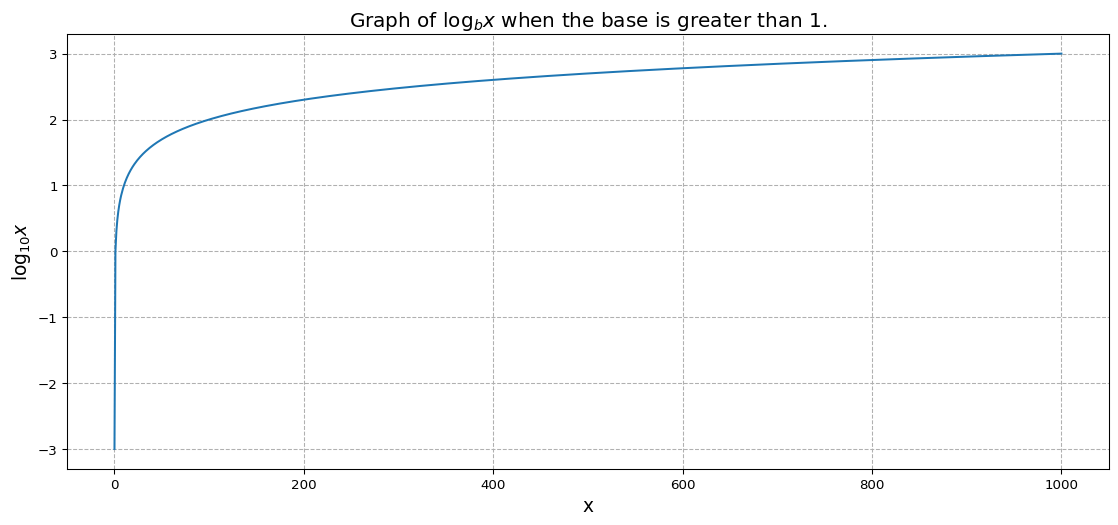

In [ ]:
# create an array containing a few real numbers between 0.001 and 1000 (including both).
# Plot these numbers with their corresponding log values on the base 10.
array = np.linspace(0.001, 1000, 1000) # Creating an array of 1000 real numbers between 0.001 and 1000.
print("First 10 numbers stored in the array:\n", array[:10], "\n")

plt.figure(figsize = (14, 6), dpi = 96)
plt.title("Graph of " + r"$\log_b x$" + " when the base is greater than 1.", fontsize = 15)
plt.plot(array, np.log10(array))
plt.xlabel(r'x', fontsize = 14)
plt.ylabel(r'$\log_{10} x$', fontsize = 14)
plt.grid(which = 'major', axis = 'both', linestyle = '--')
plt.show()

From the above graph, you can see that **when the base $b$ is greater than 1, the graph of a log function continuously increases as the values on the $x$-axis increase.**

Also whenever $x$ is between 0 and 1 i.e. $0 < x < 1$, the corresponding log values are negative.

The graph of a log function rises very sharply for the initial values of $x$. As the $x$ values start increasing from a particular point, the curve starts flattening.

Now, let's create a graph of a log function when the base is less than 1.

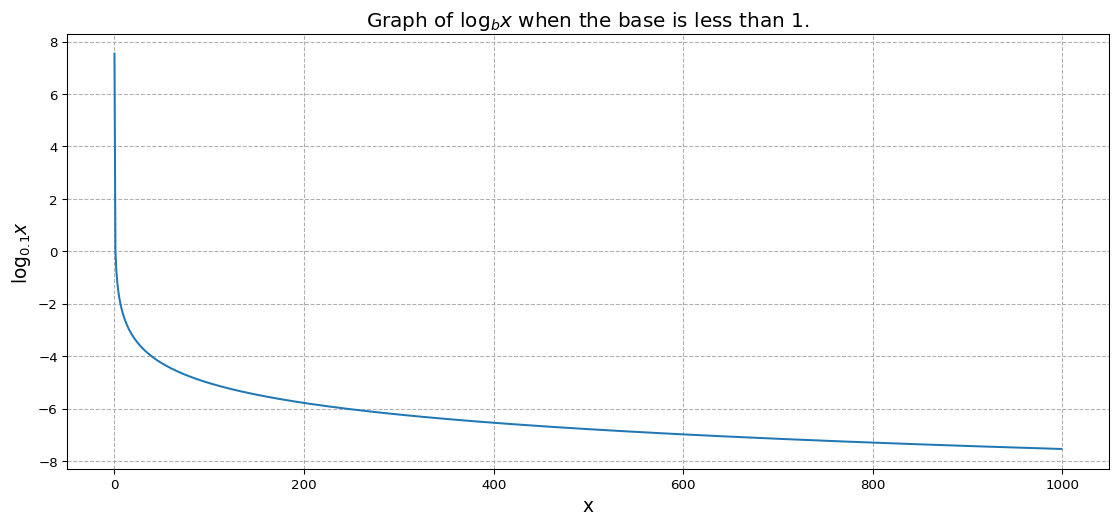

In [ ]:
#  Repeat the above exercise when the base is less than 1, say b = 0.1
import math

log_base_1_over_10 = [math.log(i, 0.4) for i in array]

plt.figure(figsize = (14, 6), dpi = 96)
plt.title("Graph of " + r"$\log_b x$" + " when the base is less than 1.", fontsize = 15)
plt.plot(array, log_base_1_over_10)
plt.xlabel(r'x', fontsize = 14)
plt.ylabel(r'$\log_{0.1} x$', fontsize = 14)
plt.grid(which = 'major', axis = 'both', linestyle = '--')
plt.show()

From the above graph, you can see that **when the base $b$ is less than 1, the graph of a log function continuously decreases as the values on the $x$-axis increase.**

Here, the graph of a log function drops very sharply for the initial values of $x$. As the $x$ values start increasing from a particular point, the curve starts flattening.

Now you have learnt enough of logarithms to understand the log likelihood function.


---
In the previous activity, you learnt to build a likelihood and log likelihood function as part of the building the cost function process for logistic regression to calculate the coefficients. In this activity, you build the regularised cost function and also will learn the concepts of derivatives that are heavily used in machine learning and deep learning.


---

#### Activity 1: Derivatives (or Differentiation)^

$$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

The regularised cost function, for the different values of $\beta$ produces different values. But we are looking for those $\beta$ values for which the value of the cost function is minimum. For this, you need to differentiate the regularised cost function wrt the betas i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}, \frac{\partial J}{\partial \beta_2}, \dots , \frac{\partial J}{\partial \beta_n}$. For this, you need to learn the concept of derivatives (or differentiation).


**A derivative (or differentiation) is defined as the rate of change in one quantity wrt the change in another quantity.** Let's understand this concept with the help of an example.

Consider a car travelling on a hill that has a curved path as shown in the image below.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-01.jpg' width = 800></center>

Suppose, you want to find out:

1. the rate of change in the vertical distance travelled by the car wrt to the change in the horizontal distance.

2. the point (on the horizontal axis) at which the hill has its lowest height.

To answer both the above questions, you need derivatives.

**Q: How is it related to the regularised cost function?**

**A:** Using derivatives, we want to find the values of betas (called optimised betas) at which the cost function has its lowest value. These optimised beta values are used to calculate the decision boundary and thereby to build a logistic regression model.

**Q: How derivatives are used to find out the points at which the value of a cost function (regularised or non-regularised) is zero?**

**A:** Let's continue with the above example and try to find out the points on the horizontal axis at which the height of the hill is the minimum (or lowest).

You can represent the curvature of the hill on the $x$-$y$ axes as shown below.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-02.jpg' width = 700></center>


You can draw different tangents (**a tangent at a point is a straight line that touches a curve**) at different points on this curve as well as shown in the images below.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-03.jpg' width = 700></center>

The slope of the tangent shown in the above image is positive because the tangent makes an acute angle with the $x$-axis. In the next image, the slope of the second tangent is 0 because it is parallel to the $x$-axis.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-04.jpg' width = 700></center>

In the next image, the slope of the third tangent is negative because it makes an obtuse angle with the $x$-axis.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-05.jpg' width = 700></center>

The next image shows three more tangents that are parallel to the $x$-axis.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-06.jpg' width = 700></center>

All the tangents having the slope equals to zero are shown in the purple colour.

**Q: What is so special about the tangents having the slope equal to 0?**

**A: A point on a curve at which the slope of a tangent is zero, is the point where the curve has either its maximum value (peak) or minimum value (valley).** For e.g., at the point $x_2$, the curve has its peak (or maximum value) and at $x_5$, it has its valley (or minimum value).

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-07.jpg' width = 800></center>

Using derivatives (or differentiation), you can get the mathematical expression of tangents to any curve and then equate them with zero to find out the points at which the slope of these tangents are equal to zero.


---

#### Activity 2: Rate of Change & Slope of A Tangent^^

**Q: How to compute derivatives?**

As discussed earlier, a derivative (or differentiation) is defined as the rate of change in one quantity wrt the change in another quantity.

To calculate the rate of change, first, we need a relationship between the two quantities. In this case, we need a relationship between the height of the hill and its length. So here, we are provided with the equation of the curved path (or curvature/trajectory) of the hill shown in the above example. It is given as

$$y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$$

where

- $y$ is the height of the hill from the ground

- $x$ is the horizontal length of the hill.

Let's plot the curvature of the hill using the `matplotlib.pyplot` module.

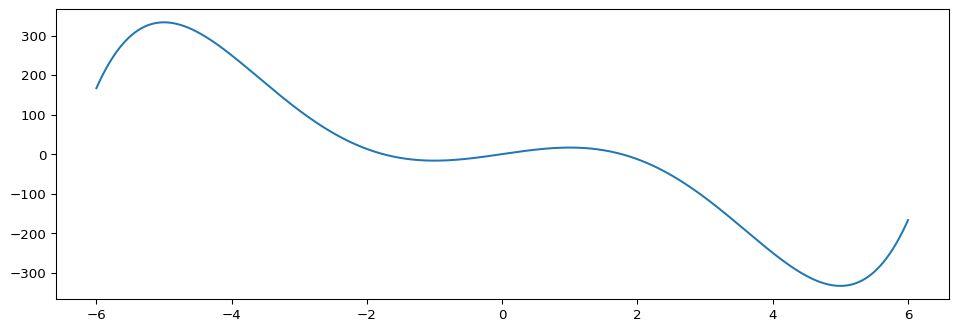

In [ ]:
#  Plot the curvature of the hill using the 'matplotlib.pyplot' module for the length of the hill bounded between x = -6 and x = 6 only.
import numpy as np
import matplotlib.pyplot as plt

def curvature(x):
  return x ** 5 / 5 - 26 * x ** 3 / 3 + 25 * x

x_values = np.linspace(-6, 6, 100000) # Here, we have taken 100 thousand points between x = -6 and x = 6.
y_values = curvature(x_values)

plt.figure(figsize = (12, 4), dpi = 96)
plt.plot(x_values, y_values)
plt.show()

In [ ]:
y_values[:10]

array([166.8       , 166.84619649, 166.89238503, 166.93856562,
       166.98473826, 167.03090296, 167.07705971, 167.12320852,
       167.16934939, 167.2154823 ])

Next, you need to find the rate to change of height of the hill $y$ wrt the change in the length of the hill $x$ to calculate the derivative i.e.

$$\frac{y_2 - y_1}{x_2 - x_1}$$

We can also represent the above ratio as

$$\frac{\delta y}{\delta x}$$

where

- $\delta y$ (to be read as **delta $y$**) denotes a small change in the values of $y$

- $\delta x$ (to be read as **delta $x$**) denotes a small change in the values of $x$



---

#### Activity 3: Derivative as Rate of Change

**Q: How to calculate the rate of change in $y$ wrt the change in $x$?**

**A:** We already know that $y$ is dependent on $x$. In other words, $y$ is a function of $x$. Mathematically, it can be represented as

$$y = f(x)$$

So, for $x = 1$, the equation of trajectory of the hill gives,

\begin{align}
y &= f(1) \\
&= \frac{1}{5} - \frac{26}{3} + 25 \\
&= 16.533
\end{align}

Similarly, for $x = 2$, the equation of trajectory of the hill gives,

\begin{align}
y &= f(2) \\
&= \frac{2^5}{5} - \frac{26}{3}\times 2^4 + 25 \times 2 \\
&= -12.933
\end{align}

With this idea in mind, now let's consider the right-most part of the hill as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-09.jpg' width = 700></center>

Also, let a line intersect this part of the curve at the points A and B as shown in the above image. This line will become a tangent to the curve at the point of minimum value, i.e. $x_5$, when both the points A and B approach each other as shown in the images below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-10.jpg' width = 700></center>

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-11.jpg' width = 700></center>

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-12.jpg' width = 700></center>

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-13.jpg' width = 700></center>

This will happen if the vertical and the horizontal distances between the points A and B approach 0.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-14.jpg' width = 700></center>

i.e., $\delta y \rightarrow 0$ and $\delta x \rightarrow 0$

where

- $\delta y$ is a small change in the values of $y$ or graphically, the vertical distance between the points A and B=

- $\delta x$ (to be read as **delta $x$**) is a small change in the values of $x$ or graphically, the horizontal distance between the points A and B

Let $x$ and $x + h$ be any two arbitrary points on the $x$-axis. So the corresponding points on the $y$-axis will be $y = f(x)$ and $y = f(x + h)$ (on substituting $x$ and $x + h$ in the equation of trajectory of the hill) as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-15.jpg' width = 700></center>

\begin{align}
\therefore \delta x &= x + h - x \\
&= h
\end{align}

and

\begin{align}
\delta y &= f(x + h) - f(x)
\end{align}

So, the rate of small change in $y$ wrt the small change in $x$ is given as

\begin{equation}
\frac{\delta y}{\delta x} = \frac{f(x + h) - f(x)}{h}
\tag{3.1}
\end{equation}

And when the small change in the $x$ approaches, 0 i.e. $h \rightarrow 0$, then the equation (3.1) becomes

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\tag{3.2}
\end{equation}

The term $\lim_{h \rightarrow 0}$ denotes that $h$ is approaching to 0 or limiting to 0.

Now, on substituting the two expressions

$$f(x + h) = \frac{(x + h)^5}{5} - \frac{26}{3}(x + h)^3 + 25(x + h)$$

and

$$f(x) = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$$

in equation (3.2), we get

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{\left( \frac{1}{5}(x + h)^5 - \frac{26}{3}(x + h)^3 + 25(x + h) \right) - \left( \frac{x^5}{5} - \frac{26}{3}x^3 + 25x \right)}{h}
\tag{3.3}
\end{equation}

In equation (3.3), let

\begin{equation}
\text{term 1} = \frac{1}{5}(x + h)^5 - \frac{26}{3}(x + h)^3 + 25(x + h)
\end{equation}

and

\begin{equation}
\text{term 2} = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x
\end{equation}

So equation (3.3) becomes,

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{\text{term 1} - \text{term 2}}{h}
\tag{3.4}
\end{equation}

---

#### Activity 4: Solving Derivative^^^

Now, let's first expand $\text{term 1}$ separately using the binomial expansion i.e.

\begin{align}
(a + b)^n &= \sum_{r = 0}^n {}^nC_r a^{n - r} b^r \\
&= {}^nC_0 a^n b^0 + {}^nC_1 a^{n - 1} b + {}^nC_2 a^{n - 2} b^2 + \dots + {}^nC_{n - 1} a^1 b^{n - 1} + {}^nC_n a^0 b^n    
\end{align}

and

\begin{equation}
{}^nC_r = \frac{n!}{(n - r)! r!}
\end{equation}

So upon expansion, $\text{term 1}$ becomes

\begin{align}
\text{term 1} &= \frac{1}{5}(x + h)^5 - \frac{26}{3}(x + h)^3 - 25(x + h) \\
&= \frac{1}{5} \left( {}^5C_0 x^5 + {}^5C_1 x^4 h + {}^5C_2 x^3 h^2 + {}^5C_3 x^2 h^3 + {}^5C_4 x h^4 + {}^5C_5 h^5 \right) - \frac{26}{3} \left( x^3 + 3x^2h + 3xh^2 + h^3 \right) + 25(x + h) \\
&= \frac{1}{5} \left( x^5 + 5 x^4 h + 10 x^3 h^2 + 10 x^2 h^3 + 5 x h^4 + h^5 \right) - \frac{26}{3} \left( x^3 + 3x^2h + 3xh^2 + h^3 \right) + 25(x + h)
\end{align}

On substituting the terms (1) and (2) in equation (3.4), we get

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{\left( \frac{1}{5}(x^5 + 5 x^4 h + 10 x^3 h^2 + 10 x^2 h^3 + 5 x h^4 + h^5) - \frac{26}{3}(x^3 + 3x^2h + 3xh^2 + h^3) + 25(x + h) \right) - \left( \frac{x^5}{5} - \frac{26}{3}x^3 + 25x \right)}{h}
\tag{4.1}
\end{equation}

In the above equation, let's neglect all the higher powers of $h$ i.e., $h^2, h^3, h^4$ and $h^5$ because we assume that $h$ approaches to 0 or it is very very small, say $h = \frac{1}{10^5}$. So $h^2 = \frac{1}{10^{10}}$

Hence, on neglecting all the terms having higher powers of $h$ in equation (4.1), we get

\begin{align}
\frac{dy}{dx} &= \lim_{h \rightarrow 0} \frac{\left( \frac{1}{5}(x^5 + 5 x^4 h) - \frac{26}{3}(x^3 + 3x^2h) + 25(x + h) \right) - \left( \frac{x^5}{5} - \frac{26}{3}x^3 + 25x \right)}{h} \\
&= \lim_{h \rightarrow 0} \frac{ \frac{x^5}{5} + x^4 h - \frac{26}{3}x^3 - 26 x^2h + 25x + 25h  - \frac{x^5}{5} + \frac{26}{3}x^3 - 25x}{h} \\
&= \lim_{h \rightarrow 0} \frac{ x^4 h  - 26 x^2h + 25h}{h} \\
&= \lim_{h \rightarrow 0} \frac{h (x^4  - 26 x^2 + 25)}{h} \\
&= \lim_{h \rightarrow 0} \space{} (x^4  - 26 x^2 + 25) \\
\Rightarrow \frac{dy}{dx} &= x^4  - 26 x^2 + 25
\end{align}

Finally, we obtained the derivative of $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$. In other words, it is the rate of a very small change in $y$ wrt the very small change in $x$.

It is also the slope of the tangent to the curve as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-16.jpg' width = 700></center>

Because in $\Delta ABC$

\begin{align}
\tan \theta &= \frac{AC}{CB} \\
&= \frac{f(x + h) - f(x)}{h}
\end{align}

For a very small change, i.e., $h \rightarrow 0$

\begin{align}
\tan \theta &= \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} \\
\Rightarrow \tan \theta &= \frac{dy}{dx}
\end{align}

Now, if the slope of this tangent is 0, then

\begin{align}
\frac{dy}{dx} &= 0\\
\Rightarrow x^4  - 26 x^2 + 25 &= 0 \\
\Rightarrow (x^2 - 1)(x^2 - 25) &= 0 \\
\Rightarrow (x - 1)(x + 1)(x - 5)(x + 5) &= 0
\end{align}

Hence, $x = -5, -1, 1$ and $x = 5$ are the points where the slopes of the tangents to the curvature of the hill are 0.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-17.jpg' width = 700></center>

And at $x = -5$, the value of $y$ will be maximum (peak of the hill) and at $x = 5$, the value of $y$ will be minimum (lowest height of the hill).

In [ ]:
# Calculate the maximum and minimum heights of the hill.
print(f"Peak of the hill = {(1/5) * (-5) ** 5 + (-26/3) * (-5) ** 3 + 25 * (-5):.3f} units")
print(f"Lowest height of the hill = {(1/5) * 5 ** 5 + (-26/3) * 5 ** 3 + 25 * 5:.3f} units")

Peak of the hill = 333.333 units
Lowest height of the hill = -333.333 units


**Note:** In physical terms, when the height of a landscape is negative, it means that part of the landscape is submerged under an ocean or a sea as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/Carter-Hypso-500.jpg'>

**Image credits:** *http://my.ilstu.edu/~jrcarter/LDEO/Geo201maps.htm*

</center>

Now that you have learnt the concept of derivatives, you are in a position to differentiate the regularised cost function wrt betas to calculate the optimum values of betas to build a logistic regression model. In other words, you are ready to calculate the rate of change in the cost function wrt change in betas. You will learn this in the next class.

For the time being, let's stop here.

---

#### Activity 5: Log Likelihood Function

So far, you have got the likelihood function for only one record i.e.

\begin{equation}
P(y \space{} | \space{} x; \beta) = p^y (1 - p)^{(1 - y)}
\end{equation}

To get the likelihood function for all the records, you need to multiply the probabilities of success and failure for all the records i.e.

\begin{equation}
P(y \space{} | \space{} x; \beta) = p_{1} ^{y_{1}} (1 - p_1)^{(1 - y_{1})} \times p_{2} ^{y_{2}} (1 - p_2)^{(1 - y_{2})} \times p_{3} ^{y_{3}} (1 - p_3)^{(1 - y_{3})} \dots p_{m} ^{y_{m}} (1 - p_m)^{(1 - y_{m})}
\end{equation}

The above expression can also be represented as

\begin{equation}
P(y \space{} | \space{} x; \beta) = \prod_{i = 1} ^{m} p_{i}^{y_{i}} (1 - p_i)^{(1 - y_i)}
\end{equation}

Now we are ready to look at the log-likelihood function. But first, let's go through a couple of properties of log.

**Logarithm Property 2:** It says that for number $a^k$ whose log is to be taken on the base $b$ can also be written as the $k$ times the log of the number $a$ on the base $b$ i.e.

\begin{equation}
\log_b a^k = k \log_b a
\end{equation}


**Logarithm Property 3:** It says that the log of the product of two or more numbers on a base is equivalent to the sum of the log of two or more numbers on that base.

For eg. the number $30$ can be expressed as the product of three numbers i.e. $2 \times 3 \times 5$. So the log of $30$ on the base $2$ i.e. $\log_2 30$ can also be written as $\log_2 2 + \log_2 3 + \log_2 5$ as shown below

\begin{align}
30 &= 2 \times 3 \times 5 \\
\therefore \log_2 30 &= \log_2 (2 \times 3 \times 5) \\
&= \log_2 2 + \log_2 3 + \log_2 5 \\
&= 1 + \log_2 3 + \log_2 5
\end{align}

$\log_2 2 = 1$ because $2^1 = 2$. In fact, this is another property of log (**logarithm property 4**) which says that log of any number on taking the same number as the base is equal to $1$. Mathematically,  $\log_b b = 1$

In general, for $n$ numbers $m_1, m_2, m_3, \dots m_n > 0$, the third property of log says

\begin{align}
\log_b (m_1 m_2 m_3 \dots m_n) = \log_b m_1 + \log_b m_2 + \log_b m_3 + \dots + \log_b m_n
\end{align}

where $b$ is some base and $0 < b < 1$ or $b > 1$.

So using the second property of log, the likelihood function for one record is

\begin{equation}
l = \log(p^y (1 - p)^{(1 - y)})
\end{equation}

On applying the third property of the log, you get

\begin{equation}
l = \log p^y  + \log(1 - p)^{(1 - y)}
\end{equation}

On applying the second property of the log, you get

\begin{equation}
l = y \log p  + (1 - y) \log(1 - p)
\end{equation}

**Note:** Since the base of the log is not mentioned, it is to be considered as $e$.

For $m > 1$ records, you need to add the likelihood function for all the $m$ number of records as

\begin{align}
J &= y_1 \log p_1  + (1 - y_1) \log(1 - p_1) + y_2 \log p_2  + (1 - y_2) \log(1 - p_2) + \dots + y_m \log p_m  + (1 - y_m) \log(1 - p_m) \\
&= \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))
\end{align}

This is the required log likelihood function which resembles a lot like the cost function.

Alternatively, you could also take the log of the likelihood function (for all the records) directly to get the log likelihood function


\begin{align}
J &= \log \left( \prod_{i = 1} ^{m} p_{i}^{y_{i}} (1 - p_i)^{(1 - y^{y_{i}})} \right) \\
&= \log \left( p_{1} ^{y_{1}} (1 - p_1)^{(1 - y_{1})} \times p_{2} ^{y_{2}} (1 - p_2)^{(1 - y_{2})} \dots p_{m} ^{y_{m}} (1 - p_m)^{(1 - y_{m})} \right) \\
&= \log \left( p_{1} ^{y_{1}} (1 - p_1)^{(1 - y_{1})} \right) + \log \left(p_{2} ^{y_{2}} (1 - p_2)^{(1 - y_{2})} \right) + \dots  + \log \left( p_{m} ^{y_{m}} (1 - p_m)^{(1 - y_{m})} \right) \\
&= (y_1 \log p_1  + (1 - y_1) \log(1 - p_1) ) + (y_2 \log p_2  + (1 - y_2) \log(1 - p_2)) + \dots + (y_m \log p_m  + (1 - y_m) \log(1 - p_m)) \\
&= \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))
\end{align}

The log likelihood function is negative in nature because the values of $p$ and $1 - p$ go from $0$ and $1$ and we have already seen that the log values between $0$ and $1$ is negative.

\begin{align}
\therefore \log p < 0 \space{} \text{and} \space{} \log(1 - p) < 0 \\
y \log p < 0 \space{} \text{and} \space{} (1 - y) \log(1 - p) < 0 \\
\Rightarrow y \log p + (1 - y) \log(1 - p) < 0 \\
\Rightarrow - (y \log p + (1 - y) \log(1 - p)) > 0 \\
\end{align}

Hence, to make the log likelihood function a positive function, we multiply both the sides by $-1$

In other words, $- (y \log p + (1 - y) \space{} \log(1 - p))$ is an error between the actual targets and the predicted targets and $- \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))$ is the sum of all the errors. If you divide the above equation by $m$, you get the mean of errors which we shall call the **cost function**

$$J = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))$$

Since $p_i$ is dependent on $\beta$ as

$$p_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}$$

the cost function $J$ is also dependent on $\beta$, so you can write it as $J(\beta)$ which denotes that $J$ is dependent on $\beta$

$$\therefore J(\beta) = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))$$


Let's stop here in the next class, you learn to create the regularised cost function.